In [1]:
# the workhorse numerical computing package in Python
import numpy as np

# we've already encountered this specimen
import pandas as pd

# matplotlib is Python's main plotting library.
# the plt module provides high-level access to plots.
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels.csv')
subjs = pd.unique(data['SubID'])
areas = pd.unique(data['Region'])
num_areas = len(areas)
len(subjs)

33

In [53]:
for this_subj in subjs:
    ses1_data = data[(data['Session'] == 'MR1') & (data['SubID'] == this_subj)]
    ses3_data = data[(data['Session'] == 'MR3') & (data['SubID'] == this_subj)]
    for this_area in areas[1:]:
        ses1_area = ses1_data[ses1_data['Region'] == this_area]
        ses1_perc = ses1_area['Percent_of_Total']
        ses3_area = ses3_data[ses3_data['Region'] == this_area]
        ses3_perc = ses3_area['Percent_of_Total']
        ses1_perc = ses1_perc.tolist()
        ses3_perc = ses3_perc.tolist()
        delta_area = ses3_perc[0] - ses1_perc[0]
        print(delta_area)

-0.07466673851013184
-0.024712085723876953
0.050139427185058594
-0.004392862319946289
-0.002169609069824191
-0.0006973743438720981
-0.0033199787139892023
-0.0014781951904296042
-0.001919269561767592
0.0016868114471436102
0.006145238876342787
-0.0018298625946044922
-0.00027418136596681075
-0.00016093254089351305
-0.0017166137695311945
0.0016450881958007951
-0.0024259090423583984
-0.0025629997253416997
-0.0024557113647460938
0.002366304397582994
-0.0005900859832763949
-0.003814697265625
-0.0035047531127930034
0.0032722949981689037
-0.00011324882507320055
0.0036776065826416987
-0.00032186508178710244
0.0001728534698487022
-0.0010728836059569966
-0.0025212764739990998
0.0004708766937255998
-0.00012516975402840358
0.0278055667877197
0.000721216201782296
0.0002980232238768976
-0.0008523464202880998
-0.0005781650543212995
-0.0011086463928223003
-0.0005543231964111987
0.0005185604095459019
0.0008702278137206997
0.0054478645324707
0.001591444015502999
-0.001204013824462901
-0.0006914138793945
0

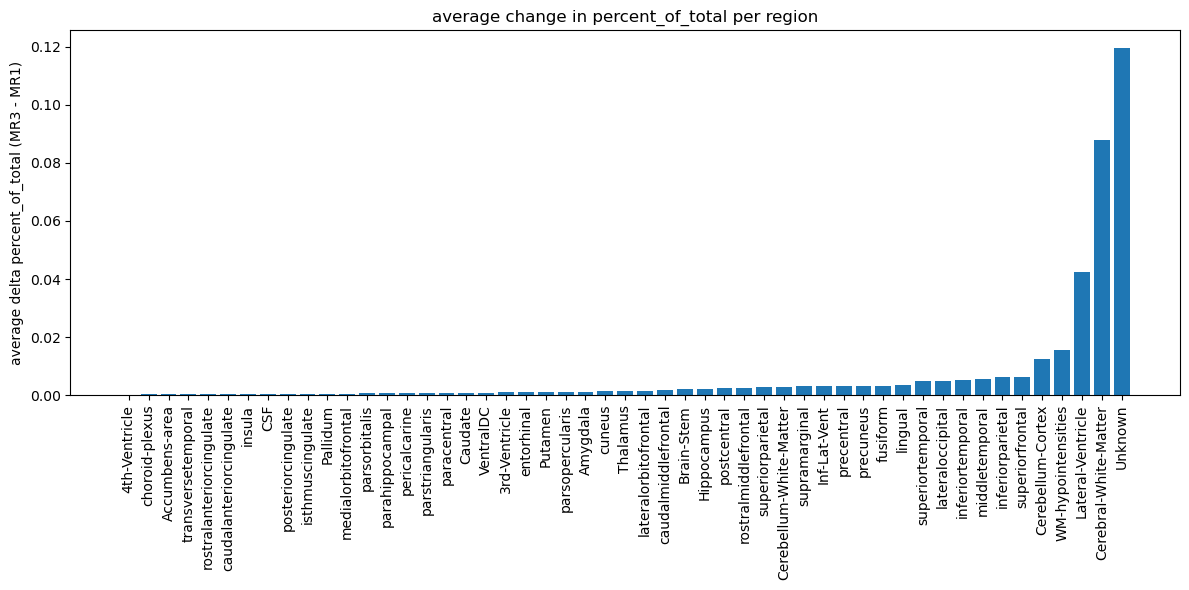

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels.csv')

# Get unique subjects and regions
subjs = pd.unique(data['SubID'])
areas = pd.unique(data['Region'])

# Dictionary to accumulate deltas per area
area_deltas = {area: [] for area in areas}

# Loop through each subject
for this_subj in subjs:
    ses1_data = data[(data['Session'] == 'MR1') & (data['SubID'] == this_subj)]
    ses3_data = data[(data['Session'] == 'MR3') & (data['SubID'] == this_subj)]

    for this_area in areas:
        ses1_area = ses1_data[ses1_data['Region'] == this_area]
        ses3_area = ses3_data[ses3_data['Region'] == this_area]

        if not ses1_area.empty and not ses3_area.empty:
            delta = ses3_area['Percent_of_Total'].values[0] - ses1_area['Percent_of_Total'].values[0]
            area_deltas[this_area].append(delta)

# Compute average delta per area
avg_deltas = {area: abs(np.mean(deltas)) for area, deltas in area_deltas.items() if deltas}

# Sort by value
avg_deltas = dict(sorted(avg_deltas.items(), key=lambda x: x[1]))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(avg_deltas.keys(), avg_deltas.values())
plt.xticks(rotation=90)
plt.ylabel('average delta percent_of_total (MR3 - MR1)')
plt.title('average change in percent_of_total per region')
plt.tight_layout()
plt.show()

In [15]:
for area, avg_delta in avg_deltas.items():
    print(f"{area}: {avg_delta:.4f}")

4th-Ventricle: 0.0002
choroid-plexus: 0.0003
Accumbens-area: 0.0003
transversetemporal: 0.0003
rostralanteriorcingulate: 0.0004
caudalanteriorcingulate: 0.0004
insula: 0.0005
CSF: 0.0005
posteriorcingulate: 0.0005
isthmuscingulate: 0.0006
Pallidum: 0.0006
medialorbitofrontal: 0.0006
parsorbitalis: 0.0006
parahippocampal: 0.0006
pericalcarine: 0.0006
parstriangularis: 0.0007
paracentral: 0.0008
Caudate: 0.0009
VentralDC: 0.0009
3rd-Ventricle: 0.0010
entorhinal: 0.0010
Putamen: 0.0010
parsopercularis: 0.0010
Amygdala: 0.0012
cuneus: 0.0013
Thalamus: 0.0014
lateralorbitofrontal: 0.0015
caudalmiddlefrontal: 0.0019
Brain-Stem: 0.0020
Hippocampus: 0.0022
postcentral: 0.0025
rostralmiddlefrontal: 0.0026
superiorparietal: 0.0028
Cerebellum-White-Matter: 0.0029
supramarginal: 0.0030
Inf-Lat-Vent: 0.0031
precentral: 0.0031
precuneus: 0.0032
fusiform: 0.0033
lingual: 0.0035
superiortemporal: 0.0049
lateraloccipital: 0.0049
inferiortemporal: 0.0053
middletemporal: 0.0055
inferiorparietal: 0.0061
s